100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw


100.0%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw




100.0%
100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

number of training samples: 60000
number of testing samples: 10000
datatype of the 1st training sample:  torch.FloatTensor
size of the 1st training sample:  torch.Size([1, 28, 28])
label of the first taining sample:  5
label of the second taining sample:  0


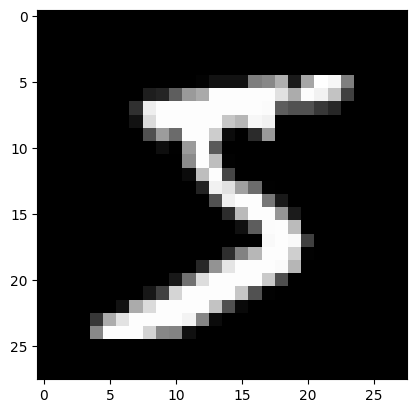

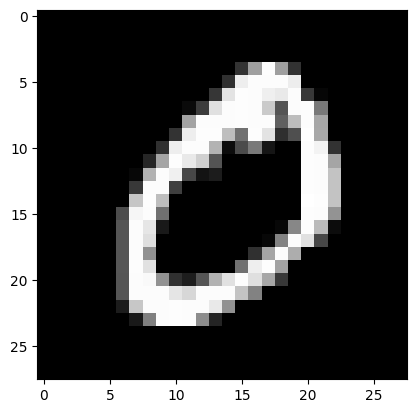

Epoch: 0. Loss: 2.202606201171875. Accuracy: 61.05
Epoch: 1. Loss: 2.0866689682006836. Accuracy: 74.67
Epoch: 2. Loss: 2.052215099334717. Accuracy: 77.97
Epoch: 3. Loss: 1.9741382598876953. Accuracy: 79.82
Epoch: 4. Loss: 1.9732165336608887. Accuracy: 80.98
Epoch: 5. Loss: 1.898044466972351. Accuracy: 81.57
Epoch: 6. Loss: 1.8560588359832764. Accuracy: 82.02
Epoch: 7. Loss: 1.8971686363220215. Accuracy: 82.42
Epoch: 8. Loss: 1.9059557914733887. Accuracy: 82.84
Epoch: 9. Loss: 1.8204714059829712. Accuracy: 83.22
Epoch: 10. Loss: 1.825208067893982. Accuracy: 83.35
Epoch: 11. Loss: 1.832144021987915. Accuracy: 83.54
Epoch: 12. Loss: 1.8701914548873901. Accuracy: 83.69
Epoch: 13. Loss: 1.7930196523666382. Accuracy: 83.75
Epoch: 14. Loss: 1.8260363340377808. Accuracy: 83.89
Epoch: 15. Loss: 1.7527960538864136. Accuracy: 84.06
Epoch: 16. Loss: 1.7965859174728394. Accuracy: 84.22
Epoch: 17. Loss: 1.7391067743301392. Accuracy: 84.37
Epoch: 18. Loss: 1.7597280740737915. Accuracy: 84.49
Epoch: 1

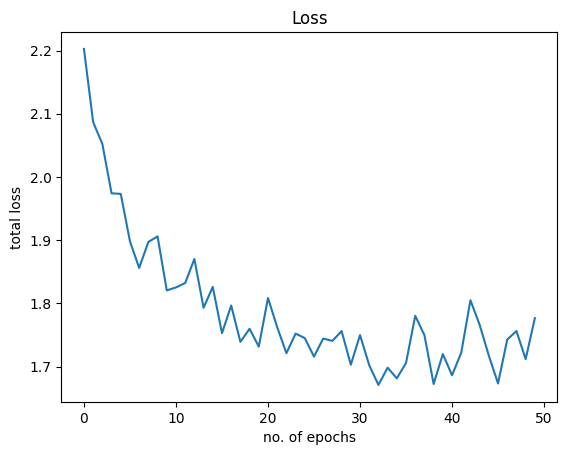

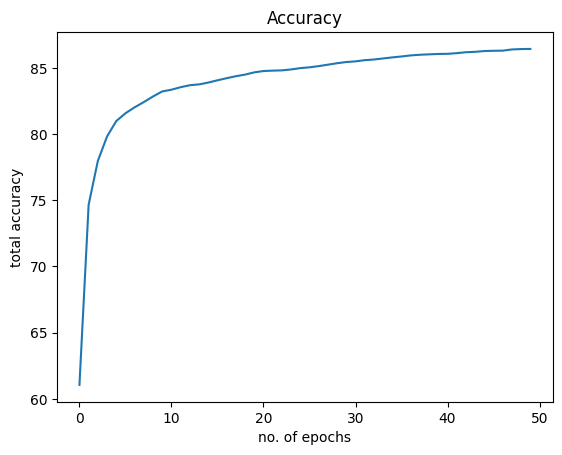

In [1]:
import torch
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
 
# loading training data
train_dataset = datasets.MNIST(root='./data', 
                               train=True, 
                               transform=transforms.ToTensor(),
                               download=True)
# loading test data
test_dataset = datasets.MNIST(root='./data', 
                              train=False, 
                              transform=transforms.ToTensor())
 
print("number of training samples: " + str(len(train_dataset)) + "\n" +
      "number of testing samples: " + str(len(test_dataset)))
print("datatype of the 1st training sample: ", train_dataset[0][0].type())
print("size of the 1st training sample: ", train_dataset[0][0].size())
 
# check the label of first two training sample
print("label of the first taining sample: ", train_dataset[0][1])
print("label of the second taining sample: ", train_dataset[1][1])
 
img_5 = train_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(img_5, cmap='gray')
plt.show()
img_0 = train_dataset[1][0].numpy().reshape(28, 28)
plt.imshow(img_0, cmap='gray')
plt.show()
 
# load train and test data samples into dataloader
batach_size = 32
train_loader = DataLoader(dataset=train_dataset, batch_size=batach_size, shuffle=True) 
test_loader = DataLoader(dataset=test_dataset, batch_size=batach_size, shuffle=False)
 
# build custom module for logistic regression
class LogisticRegression(torch.nn.Module):    
    # build the constructor
    def __init__(self, n_inputs, n_outputs):
        super().__init__()
        self.linear = torch.nn.Linear(n_inputs, n_outputs)
    # make predictions
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred
 
# instantiate the model
n_inputs = 28*28 # makes a 1D vector of 784
n_outputs = 10
log_regr = LogisticRegression(n_inputs, n_outputs)
 
# defining the optimizer
optimizer = torch.optim.SGD(log_regr.parameters(), lr=0.001)
# defining Cross-Entropy loss
criterion = torch.nn.CrossEntropyLoss()
 
epochs = 50
Loss = []
acc = []
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = log_regr(images.view(-1, 28*28))
        loss = criterion(outputs, labels)
        # Loss.append(loss.item())
        loss.backward()
        optimizer.step()
    Loss.append(loss.item())
    correct = 0
    for images, labels in test_loader:
        outputs = log_regr(images.view(-1, 28*28))
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum()
    accuracy = 100 * (correct.item()) / len(test_dataset)
    acc.append(accuracy)
    print('Epoch: {}. Loss: {}. Accuracy: {}'.format(epoch, loss.item(), accuracy))
 
plt.plot(Loss)
plt.xlabel("no. of epochs")
plt.ylabel("total loss")
plt.title("Loss")
plt.show()
 
plt.plot(acc)
plt.xlabel("no. of epochs")
plt.ylabel("total accuracy")
plt.title("Accuracy")
plt.show()

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("C:\\Users\\conor\\OneDrive\\Desktop\\school\\Data Science Minor Independent Study\\chest-xray-research\\datasets\\chest_xray_train.csv")

In [2]:
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel4088,pixel4089,pixel4090,pixel4091,pixel4092,pixel4093,pixel4094,pixel4095,file_name,class_id
0,4,3,3,2,1,0,0,0,0,2,...,108,41,0,0,0,0,0,0,img_1002194571005371555.jpg,1
1,0,13,45,71,86,95,109,103,94,96,...,99,33,0,0,0,0,0,0,img_1002972834724824498.jpg,1
2,20,20,20,20,20,20,20,20,20,20,...,53,13,21,20,20,20,20,20,img_1004160693662088646.jpg,0
3,1,11,27,49,83,107,118,123,131,140,...,149,135,112,99,65,32,10,0,img_1011159426506457600.jpg,2
4,47,77,117,79,140,64,55,62,69,67,...,136,117,68,51,36,17,27,36,img_1014387197248837154.jpg,1


In [3]:
import matplotlib.pyplot as plt

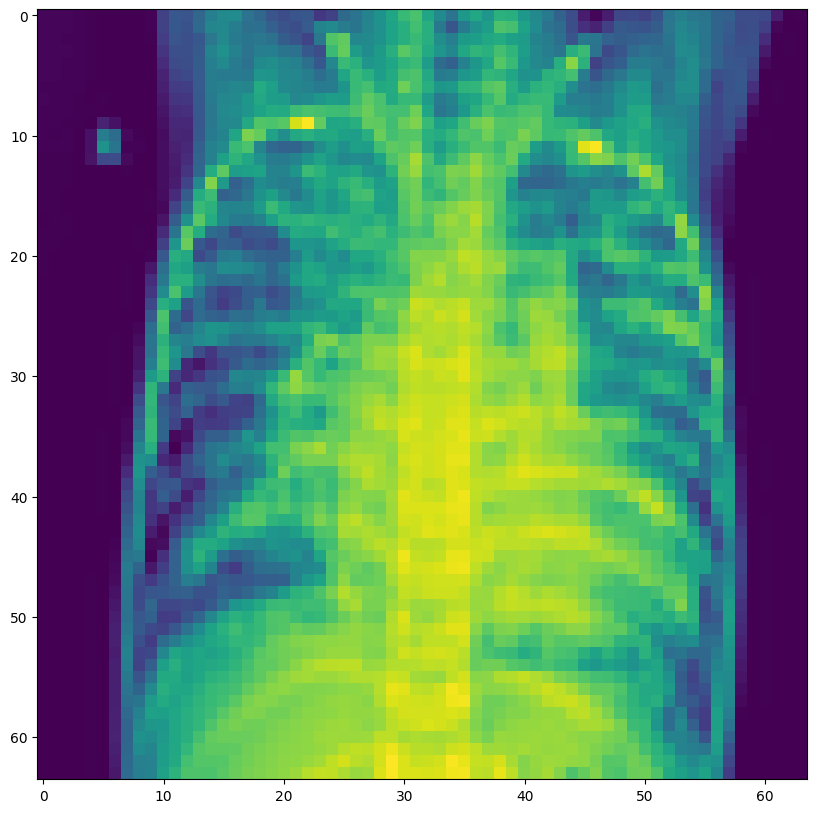

In [4]:
df_test_image = df.loc[0]
df_test_image = df_test_image[0:4096]
df_test_image = list(df_test_image)
df_test_image_reshape = np.reshape(df_test_image,(64,64))
plt.figure(figsize=(10,10))
plt.imshow(df_test_image_reshape)
# plt.show()

In [5]:
# Logistic Regression with Random Forest Classifier

In [8]:
pip install scikit-image

   ---------------------------------------- 0.0/24.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/24.5 MB 7.9 MB/s eta 0:00:04
    --------------------------------------- 0.4/24.5 MB 5.5 MB/s eta 0:00:05
   - -------------------------------------- 0.6/24.5 MB 4.4 MB/s eta 0:00:06
   - -------------------------------------- 0.8/24.5 MB 4.4 MB/s eta 0:00:06
   - -------------------------------------- 0.9/24.5 MB 4.3 MB/s eta 0:00:06
   - -------------------------------------- 1.2/24.5 MB 4.4 MB/s eta 0:00:06
   -- ------------------------------------- 1.4/24.5 MB 4.3 MB/s eta 0:00:06
   -- ------------------------------------- 1.6/24.5 MB 4.4 MB/s eta 0:00:06
   -- ------------------------------------- 1.7/24.5 MB 4.1 MB/s eta 0:00:06
   --- ------------------------------------ 1.9/24.5 MB 4.1 MB/s eta 0:00:06
   --- ------------------------------------ 2.0/24.5 MB 4.0 MB/s eta 0:00:06
   --- ------------------------------------ 2.1/24.5 MB 3.8 MB/s eta 0:00:06
   ---

In [12]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold


In [2]:
df = pd.read_csv("C:\\Users\\conor\\OneDrive\\Desktop\\school\\Data Science Minor Independent Study\\chest-xray-research\\datasets\\chest_xray_train.csv")

In [3]:
df.isnull().sum().sum()

0

In [4]:
df.duplicated().sum()

0

In [5]:
df['class_id'].value_counts()

class_id
1    2238
0    1227
2    1207
Name: count, dtype: int64

In [6]:
selected_features = list(df.columns)
selected_features.remove("file_name")
selected_features.remove("class_id")

In [7]:
selected_features

['pixel0',
 'pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pixel83',
 '

In [8]:
X = df[selected_features]
y = df['class_id']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X ,y ,test_size = 0.25)
print("Length of training data is: ", X_train.shape, '\nLength of our Testing Data', y_test.shape)

Length of training data is:  (3504, 4096) 
Length of our Testing Data (1168,)


In [10]:

kf = KFold(n_splits = 10, shuffle=True)
print("Splits " + str(kf.get_n_splits(X)))
for train, test in kf.split(X):
    print("%s %s" % (train,test))

Splits 10
[   0    1    2 ... 4669 4670 4671] [  20   24   33   34   44   53   59   69   72   74   82   91   95  101
  114  118  122  128  137  156  159  167  172  196  201  208  221  230
  234  252  265  269  271  272  275  279  296  297  301  307  332  341
  358  367  371  372  377  381  389  392  395  396  410  419  423  427
  434  448  478  499  505  514  529  531  536  548  550  553  563  595
  598  600  628  636  668  671  697  712  715  738  739  743  747  762
  792  802  807  819  828  858  871  881  888  902  903  905  913  943
  950  972  978 1005 1020 1046 1049 1060 1087 1091 1092 1102 1103 1109
 1112 1140 1162 1176 1178 1192 1210 1223 1265 1267 1273 1281 1292 1315
 1318 1330 1335 1341 1350 1359 1362 1367 1379 1385 1395 1403 1405 1408
 1412 1431 1432 1433 1446 1469 1507 1518 1520 1529 1536 1543 1547 1568
 1577 1601 1612 1640 1647 1657 1659 1672 1679 1684 1693 1695 1696 1700
 1704 1706 1708 1710 1721 1731 1745 1770 1782 1784 1809 1818 1831 1850
 1851 1853 1895 1897 1937 1941 

In [ ]:
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=2652124)
rkf.get_n_splits(X, y)


In [62]:
### Build a function thats input is an empty model, X, and y data, and runs the whole pipeline and prints a classification report and confusion matrix. 
def build_and_eval_model(model, X, y, random_state=23):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = random_state)
    
    
    model.fit(X_train, y_train)
    print(model.classes_)
    accuracy = model.score(X_test,y_test)
    print("\nAccuracy %f" % accuracy)
    
    y_pred = model.predict(X_test)
    
    print(metrics.classification_report(y_test, y_pred))
    
    # fig, ax = plt.subplots(figsize=(13,13))
    
    # metrics.plot_confusion_matrix(estimator = model, X = X_test, y_true = y_test, ax = ax)
    cm = confusion_matrix(y_test, y_pred, labels = model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
    
    disp.plot()
    plt.show()
    return model

In [40]:
def build_and_eval_kfold_model(model, X, y,folds):
    kf = KFold(n_splits = folds, shuffle=True)
    print("Splits " + str(kf.get_n_splits(X)))
    acc_scores = []
    models = []
    for train, test in kf.split(X):
        # print("%s %s" % (train,test))
        X_train, X_test = X.iloc[train,:], X.iloc[test,:]
        y_train, y_test = y[train], y[test]
        print("Length of training data is: ", X_train.shape, '\nLength of our Testing Data', y_test.shape)
        
        model.fit(X_train, y_train)
        models.append(model)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_pred, y_test)
        acc_scores.append(acc)
                                   
        #print(model.classes_)
        # accuracy = model.score(X_train,y_test)
        print("\nAccuracy %f" % (acc))

        

    cm = confusion_matrix(y_test, y_pred, labels = model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
    
    disp.plot()
    plt.show()

In [60]:
# We can use the above to try many models

C:\Users\conor\anaconda3\envs\ImageRecognition\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0 1 2]

Accuracy 0.714041
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       328
           1       0.73      0.76      0.74       545
           2       0.51      0.49      0.50       295

    accuracy                           0.71      1168
   macro avg       0.71      0.70      0.70      1168
weighted avg       0.72      0.71      0.71      1168



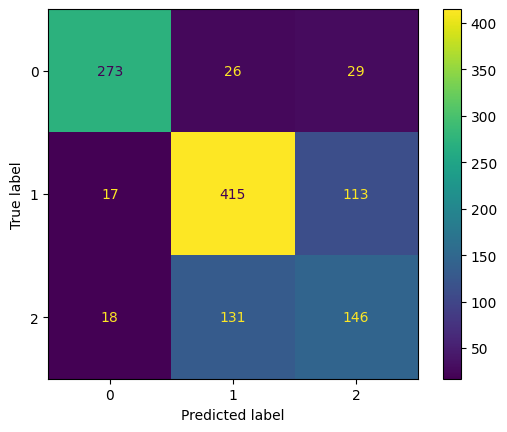

LogisticRegression(max_iter=200)

In [67]:
lr = LogisticRegression(max_iter=200)
build_and_eval_model(lr, X, y)
# 100 iterations 0.75
# 200 iterations 0.71
# 1000 iterations 0.70

[0 1 2]

Accuracy 0.801370
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       328
           1       0.77      0.90      0.83       545
           2       0.69      0.50      0.58       295

    accuracy                           0.80      1168
   macro avg       0.80      0.77      0.78      1168
weighted avg       0.80      0.80      0.79      1168



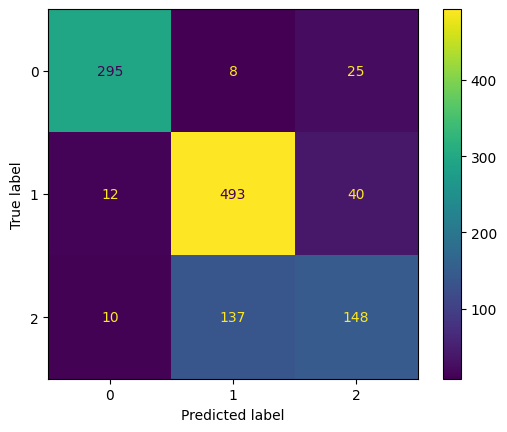

SVC()

In [63]:
from sklearn import svm # Support Vector Classifier
svc = svm.SVC()
build_and_eval_model(svc, X, y)

Splits 10
Length of training data is:  (4204, 4096) 
Length of our Testing Data (468,)

Accuracy 0.760684
Length of training data is:  (4204, 4096) 
Length of our Testing Data (468,)

Accuracy 0.799145
Length of training data is:  (4205, 4096) 
Length of our Testing Data (467,)

Accuracy 0.794433
Length of training data is:  (4205, 4096) 
Length of our Testing Data (467,)

Accuracy 0.800857
Length of training data is:  (4205, 4096) 
Length of our Testing Data (467,)

Accuracy 0.779443
Length of training data is:  (4205, 4096) 
Length of our Testing Data (467,)

Accuracy 0.820128
Length of training data is:  (4205, 4096) 
Length of our Testing Data (467,)

Accuracy 0.768737
Length of training data is:  (4205, 4096) 
Length of our Testing Data (467,)

Accuracy 0.800857
Length of training data is:  (4205, 4096) 
Length of our Testing Data (467,)

Accuracy 0.768737
Length of training data is:  (4205, 4096) 
Length of our Testing Data (467,)

Accuracy 0.792291


NameError: name 'plt' is not defined

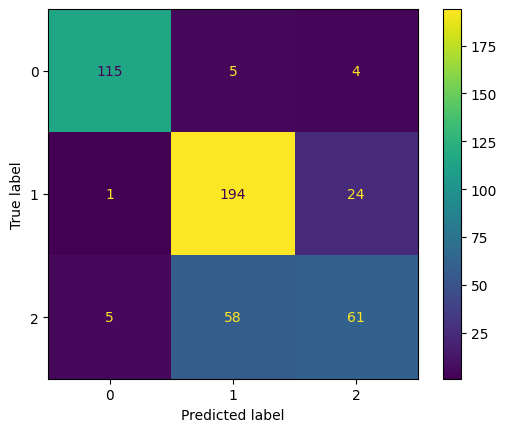

In [41]:
from sklearn import svm
svc = svm.SVC()
build_and_eval_kfold_model(svc, X, y,folds=10)